In [2]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 


pd.options.display.max_columns = 100 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
df= pd.read_csv('RegressionData.csv')

In [5]:
df.columns

Index(['Date', 'KCalories', 'Fat..g.', 'X.Of.Fat..Saturated.Fat..g..',
       'X.Of.Fat..Polyunsaturated.Fat..g..',
       'X.Of.Fat..Monounsaturated.Fat..g..', 'X.Of.Fat..Trans.Fat..g..',
       'Carbohydrates..g.', 'X.Of.Carbs..Fiber..g..', 'X.Of.Carbs..Sugar..g..',
       'Protein..g.', 'Cholesterol..mg.', 'Sodium..mg.', 'Potassium..mg.',
       'Vitamin.A', 'Vitamin.C', 'Calcium', 'Iron', 'ExerciseHours',
       'fat.percent', 'carb.percent', 'protein.percent', 'Glucose (MG/DL)',
       'Fructosamin (MMOL/L)', 'HB A1C (%)',
       'Blood Urea Nitrogen (BUN) (MG/DL)', 'Creatinine (MG/DL)',
       'Alkaline Phosphatase (U/L)', 'Bilirubin Total (MG/DL)',
       'SGOT (AST) (U/L)', 'SGPT (ALT) (U/L)',
       'Gamma Glutamyltransferase (GGTP) (U/L)', 'Total Protein (G/DL)',
       'Albumin (G/DL)', 'Globulin (G/DL)', 'Triglycerides (MG/DL)',
       'Cholesterol (MG/DL)', 'LDL (MG/DL)', 'VLDL (MG/DL)', 'HDL (MG/DL)',
       'Cholesterol Ratio '],
      dtype='object')

In [6]:
forcorr = df[['KCalories', 'Fat..g.', 'X.Of.Fat..Saturated.Fat..g..',
       'X.Of.Fat..Polyunsaturated.Fat..g..',
       'X.Of.Fat..Monounsaturated.Fat..g..', 'X.Of.Fat..Trans.Fat..g..',
       'Carbohydrates..g.', 'X.Of.Carbs..Fiber..g..', 'X.Of.Carbs..Sugar..g..',
       'Protein..g.', 'Cholesterol..mg.', 'Sodium..mg.', 'Potassium..mg.',
       'Vitamin.A', 'Vitamin.C', 'Calcium', 'Iron', 'fat.percent', 'carb.percent', 'protein.percent', 'Glucose (MG/DL)',
       'Fructosamin (MMOL/L)', 'HB A1C (%)',
       'Blood Urea Nitrogen (BUN) (MG/DL)', 'Creatinine (MG/DL)',
       'Alkaline Phosphatase (U/L)', 'Bilirubin Total (MG/DL)',
       'SGOT (AST) (U/L)', 'SGPT (ALT) (U/L)',
       'Gamma Glutamyltransferase (GGTP) (U/L)', 'Total Protein (G/DL)',
       'Albumin (G/DL)', 'Globulin (G/DL)', 'Triglycerides (MG/DL)',
       'Cholesterol (MG/DL)', 'LDL (MG/DL)', 'VLDL (MG/DL)', 'HDL (MG/DL)',
       'Cholesterol Ratio ']]

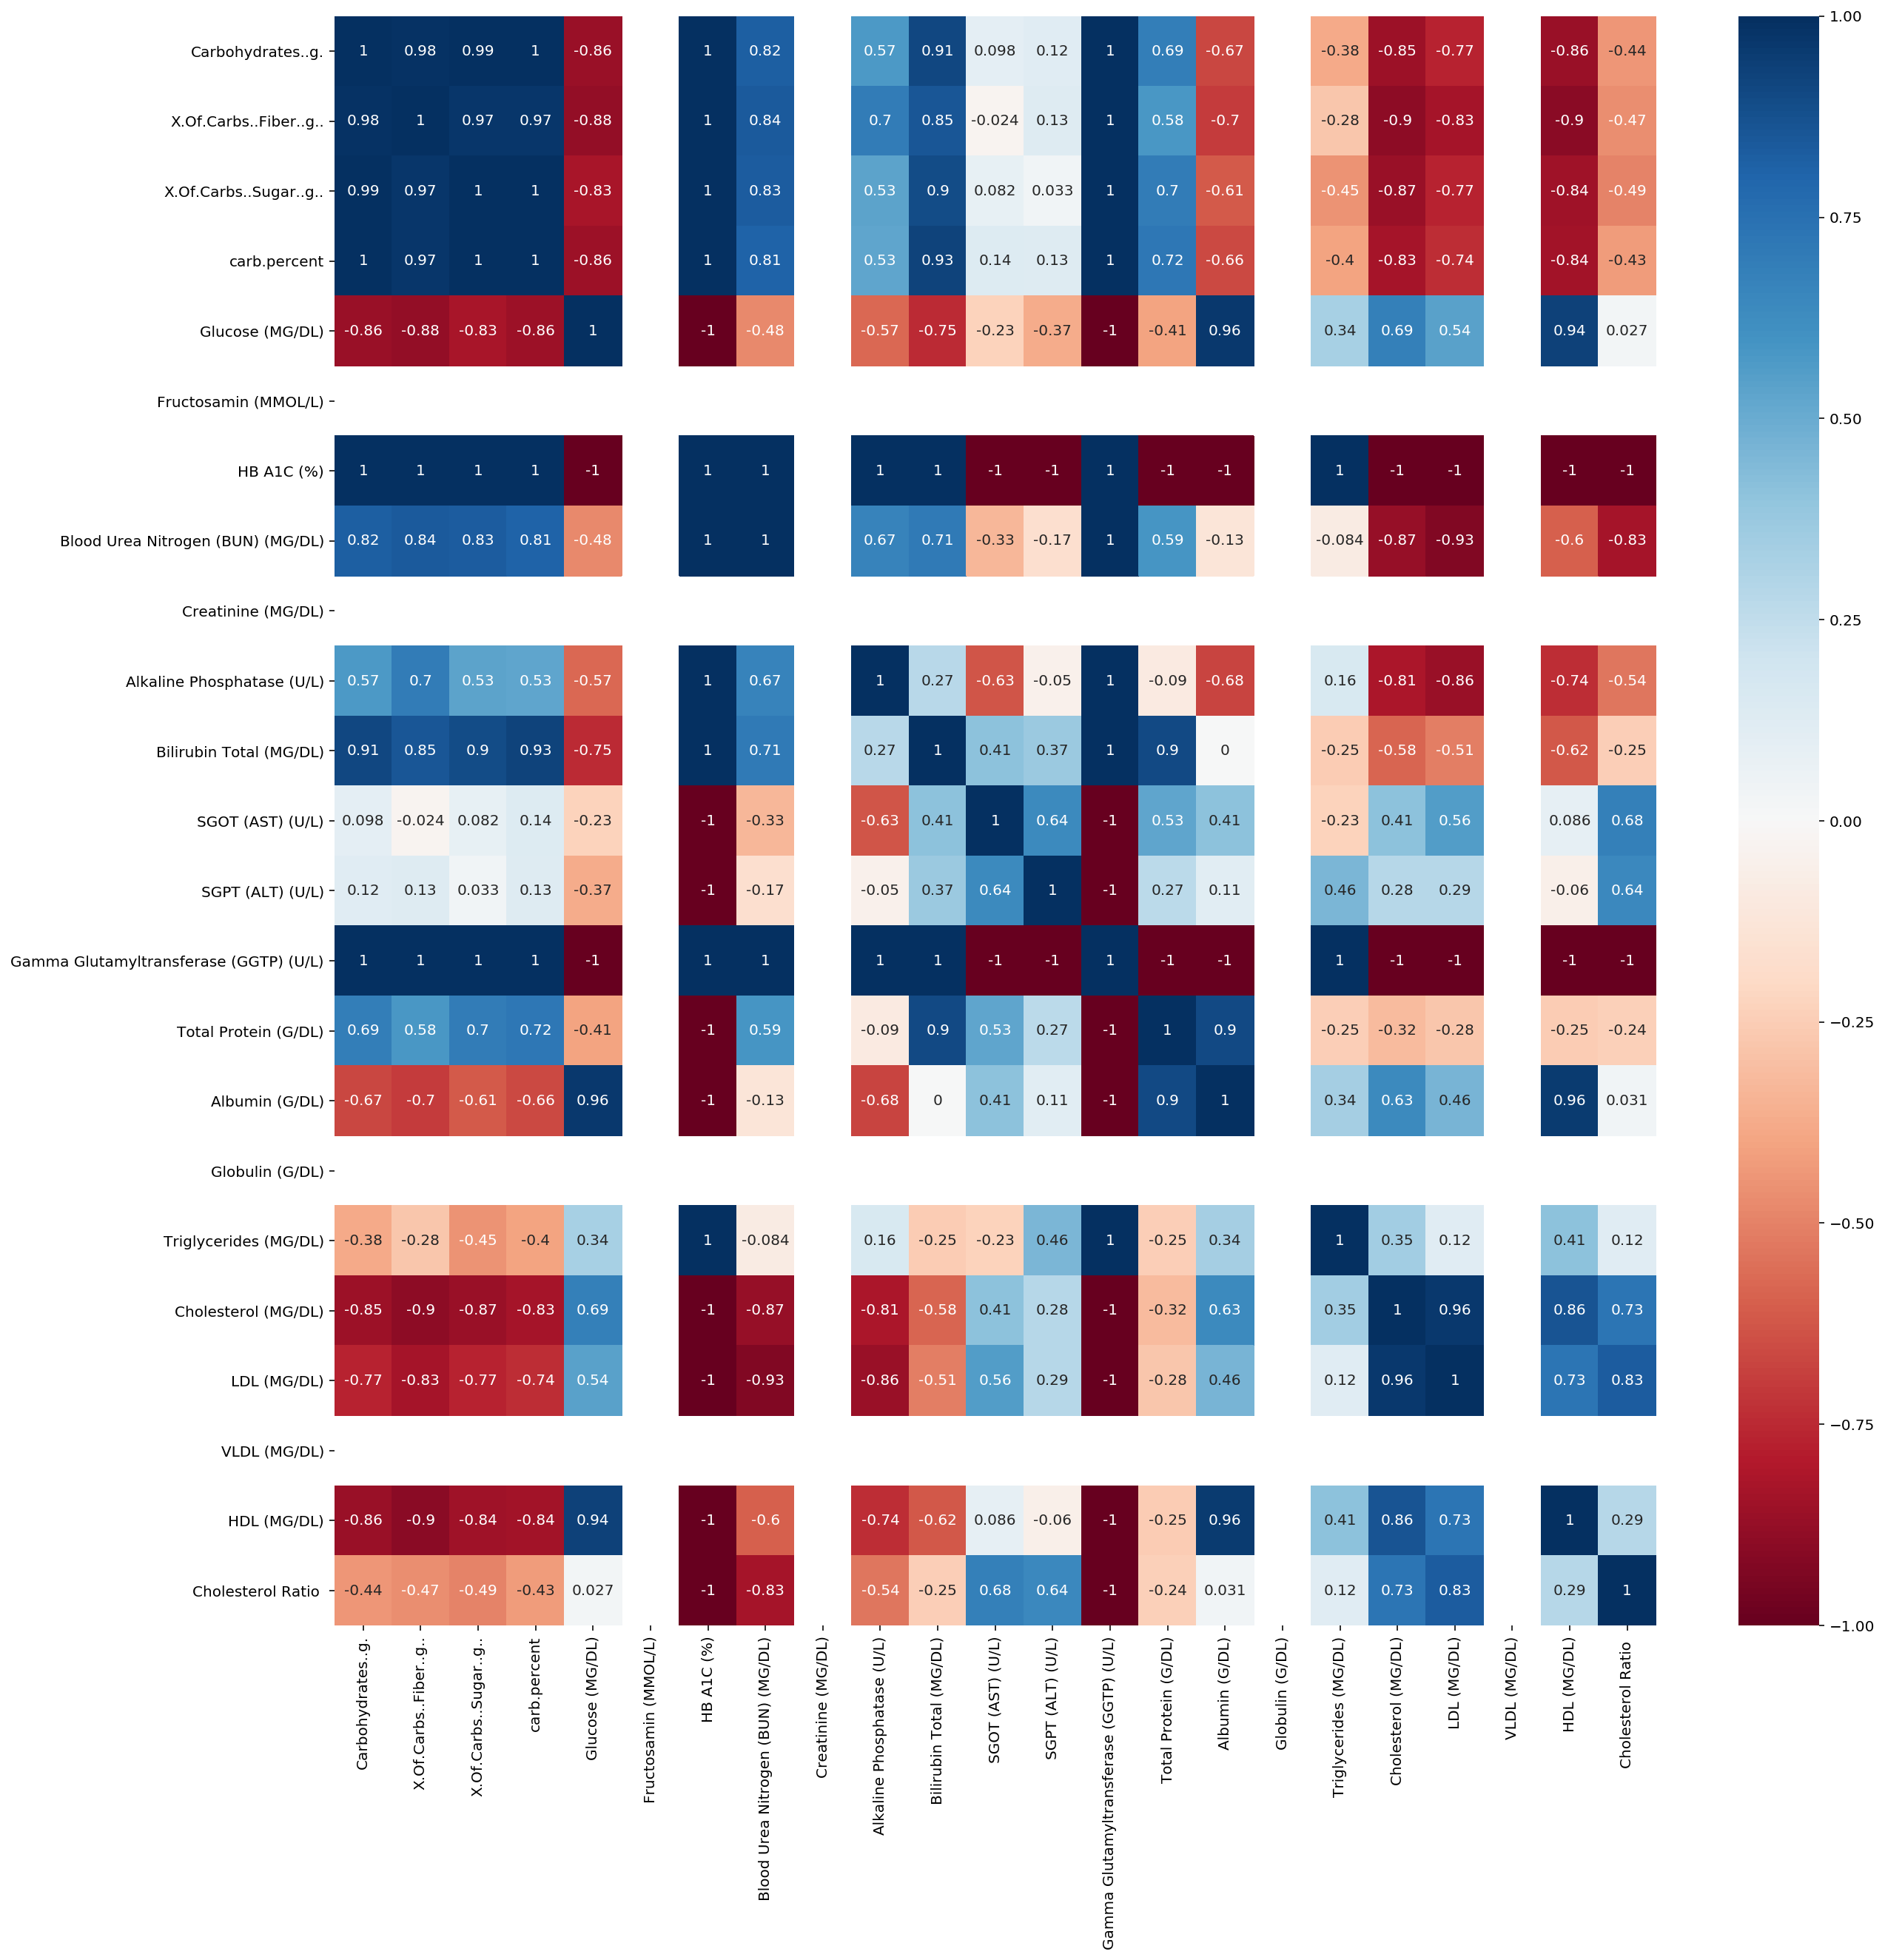

In [68]:
corrMatrix = forcorr.corr()
fig, ax = plt.subplots(figsize=(20,20))  
sns_plot = sns.heatmap(corrMatrix, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'RdBu')
sns_plot.figure.savefig('Bloodwork_Corr.png')

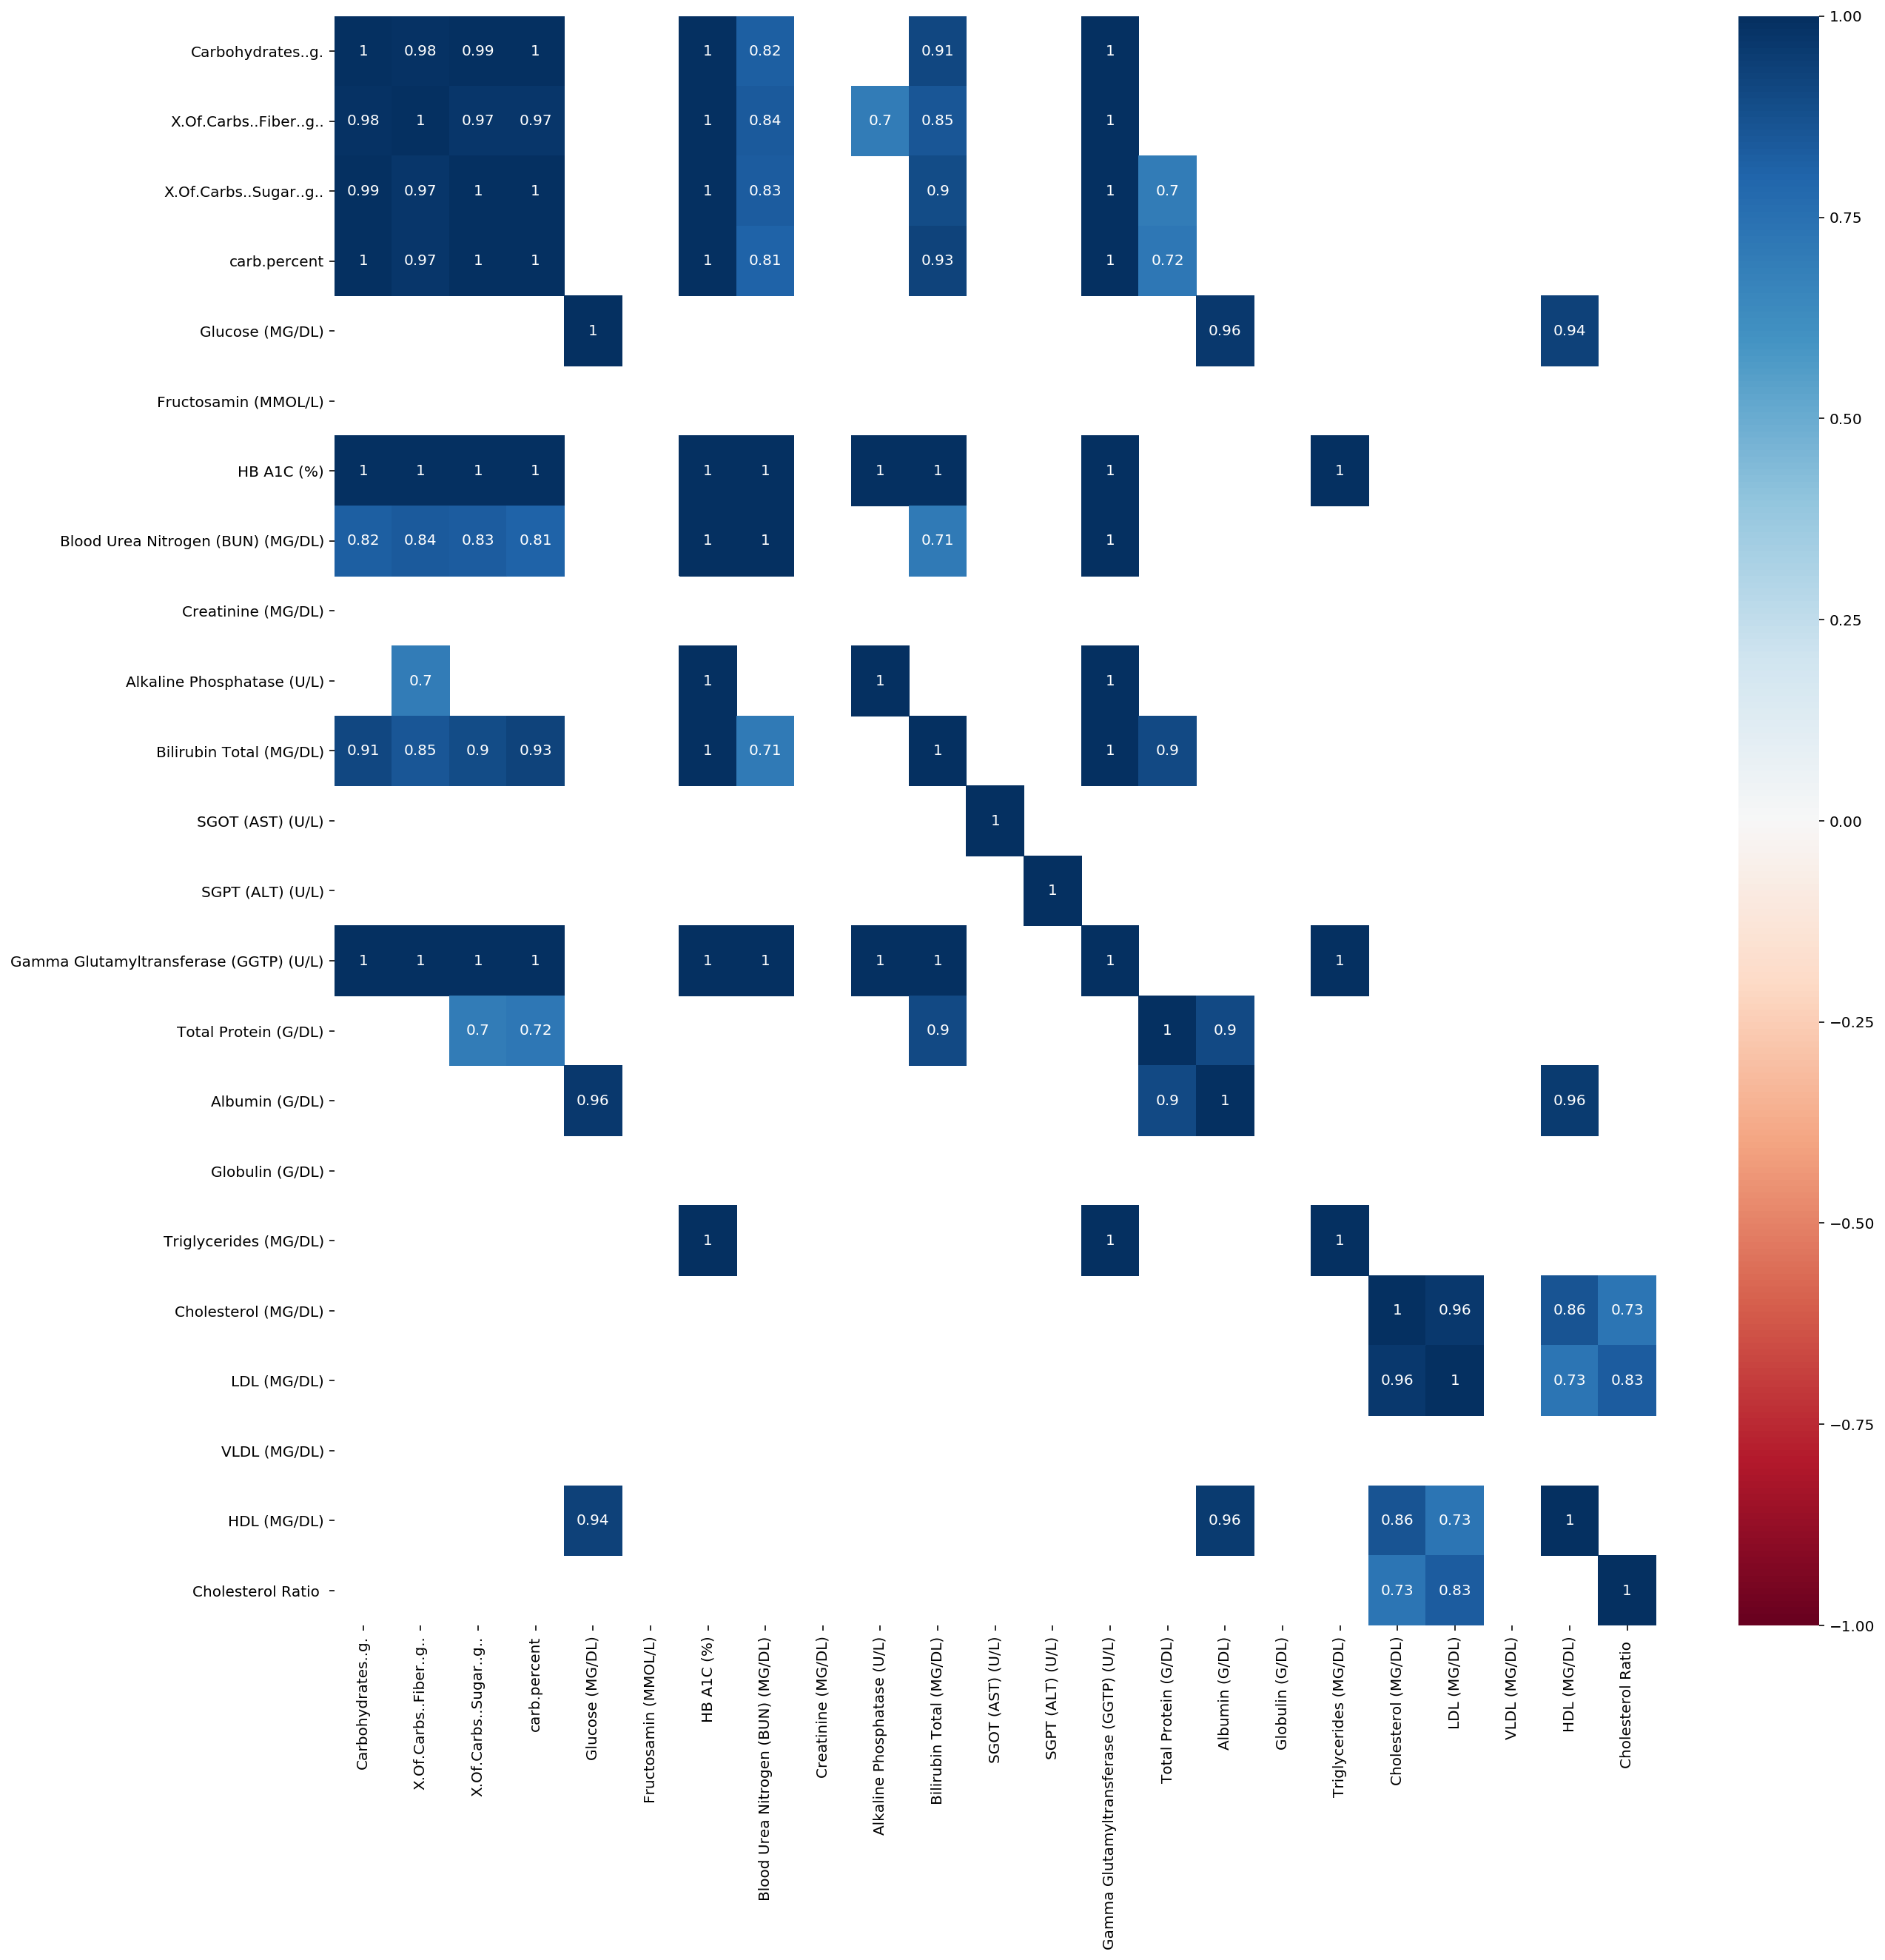

In [71]:
kot = corrMatrix[corrMatrix>=.7]
plt.figure(figsize=(20,20))
sns_plot2 = sns.heatmap(kot, annot = True, vmin=-1, vmax=1, center= 0,cmap='RdBu')
sns_plot2.figure.savefig('Bloodwork_Corr2.png')

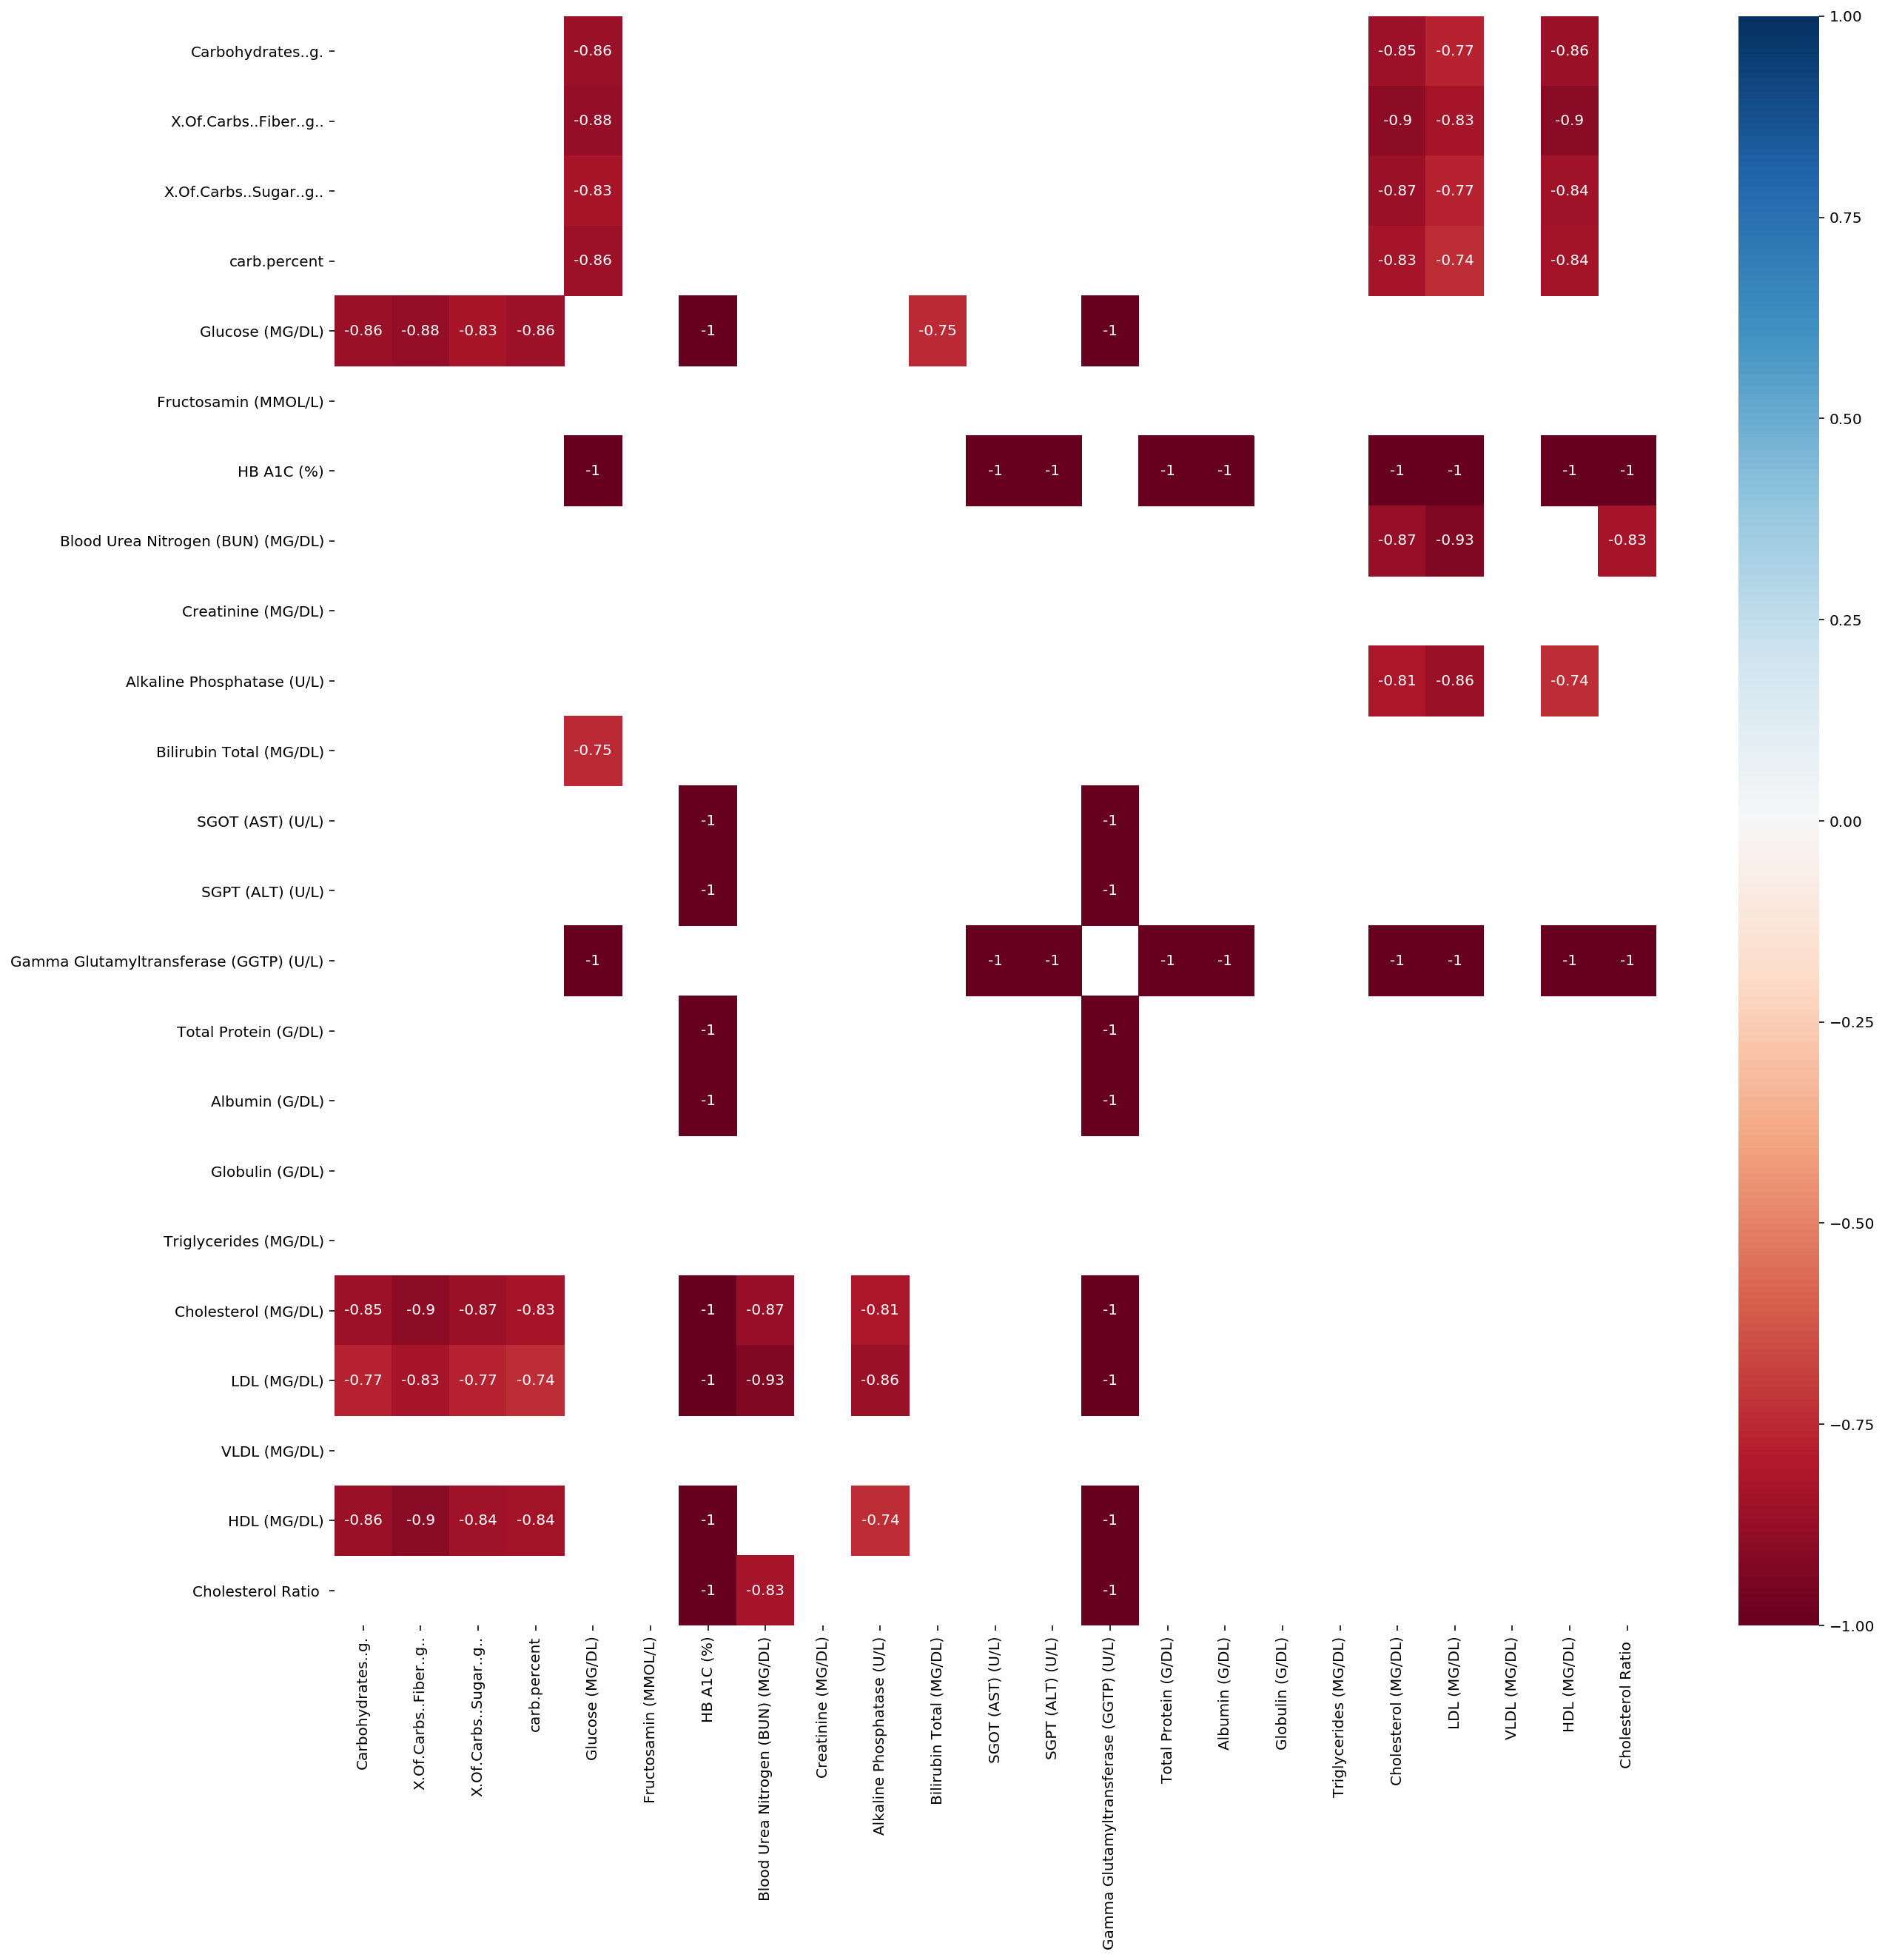

In [70]:
kot = corrMatrix[corrMatrix<=-.7]
plt.figure(figsize=(20,20))
sns_plot3 = sns.heatmap(kot, annot = True, vmin=-1, vmax=1, center= 0,cmap='RdBu')
sns_plot3.figure.savefig('Bloodwork_Corr3.png')

In [72]:
forcorr = df[['Carbohydrates..g.', 'X.Of.Carbs..Fiber..g..', 'X.Of.Carbs..Sugar..g..',
      'carb.percent','Glucose (MG/DL)',
       'Fructosamin (MMOL/L)', 'HB A1C (%)',
       'Blood Urea Nitrogen (BUN) (MG/DL)', 'Creatinine (MG/DL)',
       'Alkaline Phosphatase (U/L)', 'Bilirubin Total (MG/DL)',
       'SGOT (AST) (U/L)', 'SGPT (ALT) (U/L)',
       'Gamma Glutamyltransferase (GGTP) (U/L)', 'Total Protein (G/DL)',
       'Albumin (G/DL)', 'Globulin (G/DL)', 'Triglycerides (MG/DL)',
       'Cholesterol (MG/DL)', 'LDL (MG/DL)', 'VLDL (MG/DL)', 'HDL (MG/DL)',
       'Cholesterol Ratio ']]

KeyError: "['X.Of.Carbs..Fiber..g..', 'SGPT (ALT) (U/L)', 'Triglycerides (MG/DL)', 'Globulin (G/DL)', 'Fructosamin (MMOL/L)', 'carb.percent', 'SGOT (AST) (U/L)', 'LDL (MG/DL)', 'Bilirubin Total (MG/DL)', 'Total Protein (G/DL)', 'Cholesterol (MG/DL)', 'Blood Urea Nitrogen (BUN) (MG/DL)', 'Albumin (G/DL)', 'Carbohydrates..g.', 'VLDL (MG/DL)', 'HDL (MG/DL)', 'Cholesterol Ratio ', 'HB A1C (%)', 'Alkaline Phosphatase (U/L)', 'Creatinine (MG/DL)', 'X.Of.Carbs..Sugar..g..', 'Gamma Glutamyltransferase (GGTP) (U/L)'] not in index"

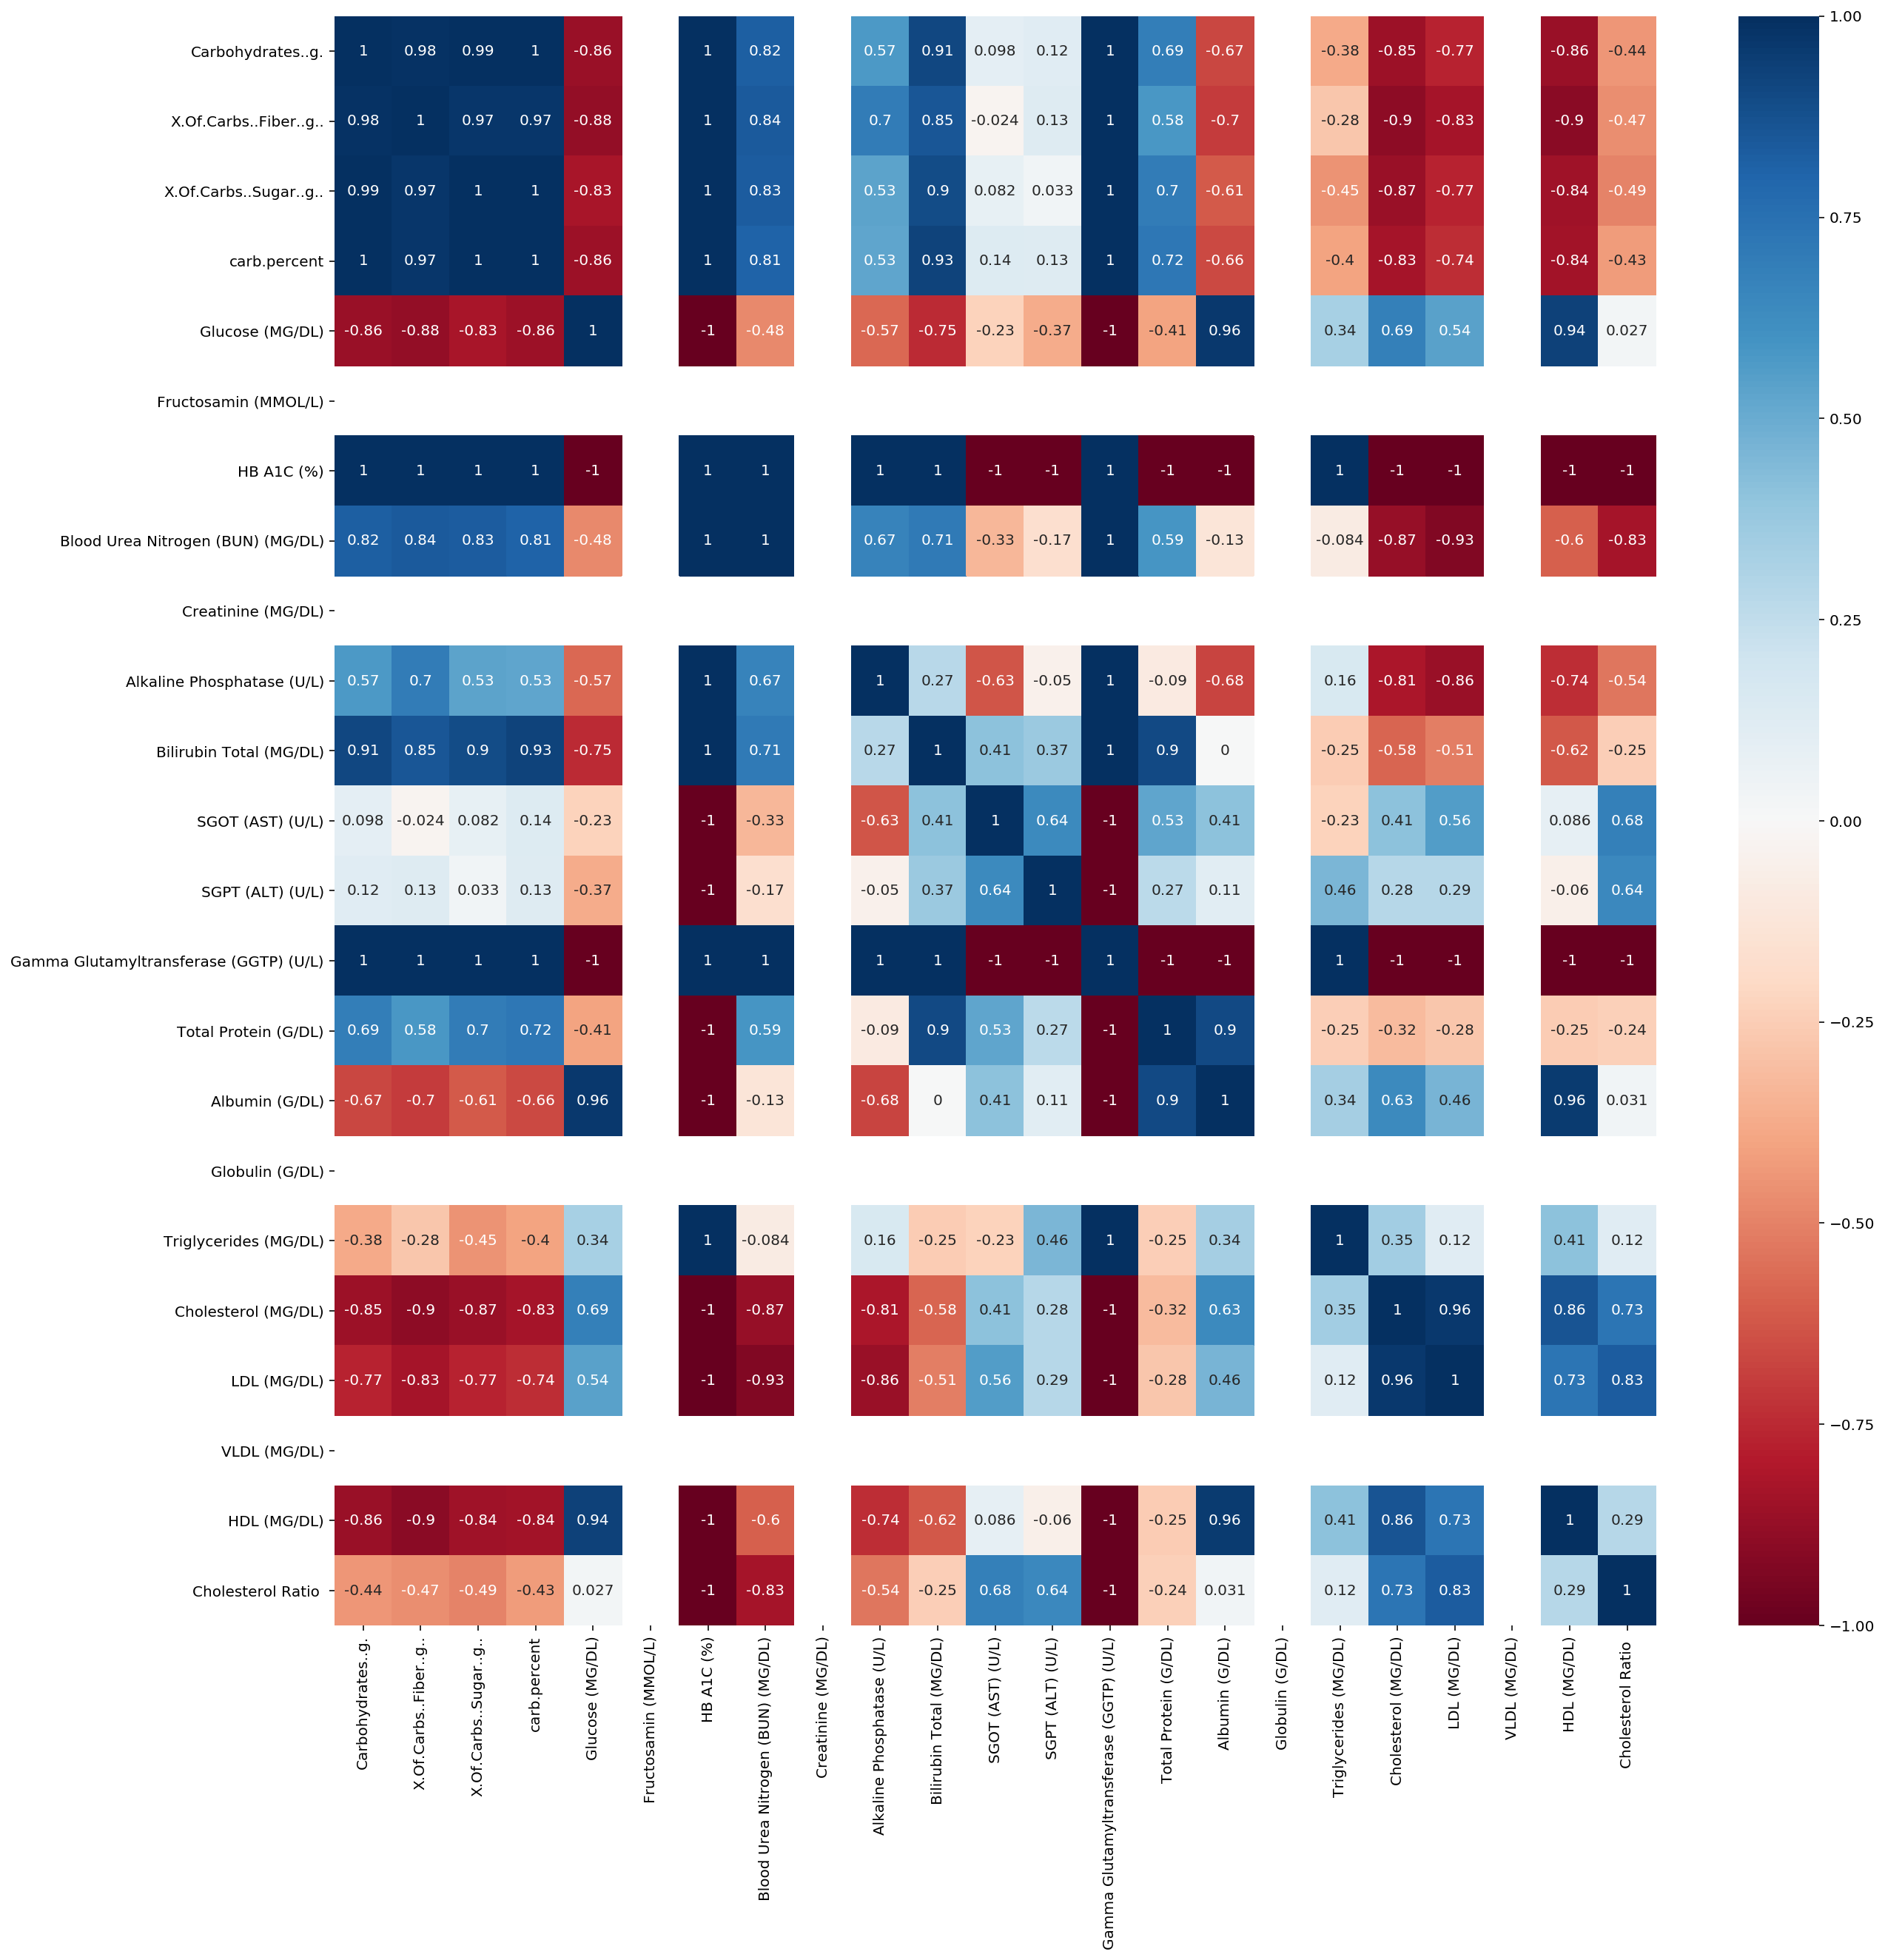

In [69]:
corrMatrix = forcorr.corr()
fig, ax = plt.subplots(figsize=(20,20))  
sns_plot = sns.heatmap(corrMatrix, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'RdBu')
sns_plot.figure.savefig('Carb_Bloodwork_Corr.png')

In [38]:
df= pd.read_csv('RegressionData.csv')
df.columns

Index(['Date', 'KCalories', 'Fat..g.', 'X.Of.Fat..Saturated.Fat..g..',
       'X.Of.Fat..Polyunsaturated.Fat..g..',
       'X.Of.Fat..Monounsaturated.Fat..g..', 'X.Of.Fat..Trans.Fat..g..',
       'Carbohydrates..g.', 'X.Of.Carbs..Fiber..g..', 'X.Of.Carbs..Sugar..g..',
       'Protein..g.', 'Cholesterol..mg.', 'Sodium..mg.', 'Potassium..mg.',
       'Vitamin.A', 'Vitamin.C', 'Calcium', 'Iron', 'ExerciseHours',
       'fat.percent', 'carb.percent', 'protein.percent', 'Glucose (MG/DL)',
       'Fructosamin (MMOL/L)', 'HB A1C (%)',
       'Blood Urea Nitrogen (BUN) (MG/DL)', 'Creatinine (MG/DL)',
       'Alkaline Phosphatase (U/L)', 'Bilirubin Total (MG/DL)',
       'SGOT (AST) (U/L)', 'SGPT (ALT) (U/L)',
       'Gamma Glutamyltransferase (GGTP) (U/L)', 'Total Protein (G/DL)',
       'Albumin (G/DL)', 'Globulin (G/DL)', 'Triglycerides (MG/DL)',
       'Cholesterol (MG/DL)', 'LDL (MG/DL)', 'VLDL (MG/DL)', 'HDL (MG/DL)',
       'Cholesterol Ratio '],
      dtype='object')

In [39]:
df = df[['carb.percent', 'Bilirubin Total (MG/DL)' ]]

In [40]:
X = df.drop(['Bilirubin Total (MG/DL)'], axis=1)
y = df['Bilirubin Total (MG/DL)']

In [41]:
import statsmodels.api as sm
results = sm.OLS(y, X).fit()
results.summary()

C:\Users\fullc\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Bilirubin Total (MG/DL)   R-squared (uncentered):                   0.925
Model:                                 OLS   Adj. R-squared (uncentered):              0.906
Method:                      Least Squares   F-statistic:                              49.23
Date:                     Tue, 08 Jun 2021   Prob (F-statistic):                     0.00217
Time:                             13:36:32   Log-Likelihood:                         0.72922
No. Observations:                        5   AIC:                                     0.5416
Df Residuals:                            4   BIC:                                     0.1510
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
carb.percent     3.8033      0.542      7.016      0.002       2.298       5.308
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.425
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.725
Skew:                          -0.305   Prob(JB):                        0.696
Kurtosis:                       1.237   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
df= pd.read_csv('RegressionData.csv')

In [60]:
df = df[['carb.percent','Glucose (MG/DL)']]

In [61]:
X = df.drop(['Glucose (MG/DL)'], axis=1)
y = df['Glucose (MG/DL)']

In [62]:
import statsmodels.api as sm
df.insert(0,'Intercept',1)
results = sm.OLS(y, X).fit()
results.summary()

C:\Users\fullc\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Glucose (MG/DL)   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                              10.78
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                      0.0304
Time:                        13:46:47   Log-Likelihood:                         -26.075
No. Observations:                   5   AIC:                                      54.15
Df Residuals:                       4   BIC:                                      53.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
carb.percent   378.8910    115.409      3.283      0.030      58.465     699.317
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.424
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.661
Skew:                          -0.778   Prob(JB):                        0.719
Kurtosis:                       2.132   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
df= pd.read_csv('RegressionData.csv')

In [64]:
df.columns

Index(['Date', 'KCalories', 'Fat..g.', 'X.Of.Fat..Saturated.Fat..g..',
       'X.Of.Fat..Polyunsaturated.Fat..g..',
       'X.Of.Fat..Monounsaturated.Fat..g..', 'X.Of.Fat..Trans.Fat..g..',
       'Carbohydrates..g.', 'X.Of.Carbs..Fiber..g..', 'X.Of.Carbs..Sugar..g..',
       'Protein..g.', 'Cholesterol..mg.', 'Sodium..mg.', 'Potassium..mg.',
       'Vitamin.A', 'Vitamin.C', 'Calcium', 'Iron', 'ExerciseHours',
       'fat.percent', 'carb.percent', 'protein.percent', 'Glucose (MG/DL)',
       'Fructosamin (MMOL/L)', 'HB A1C (%)',
       'Blood Urea Nitrogen (BUN) (MG/DL)', 'Creatinine (MG/DL)',
       'Alkaline Phosphatase (U/L)', 'Bilirubin Total (MG/DL)',
       'SGOT (AST) (U/L)', 'SGPT (ALT) (U/L)',
       'Gamma Glutamyltransferase (GGTP) (U/L)', 'Total Protein (G/DL)',
       'Albumin (G/DL)', 'Globulin (G/DL)', 'Triglycerides (MG/DL)',
       'Cholesterol (MG/DL)', 'LDL (MG/DL)', 'VLDL (MG/DL)', 'HDL (MG/DL)',
       'Cholesterol Ratio '],
      dtype='object')

In [65]:
df = df[['Calcium', 'Iron','Glucose (MG/DL)']]

In [66]:
X = df.drop(['Glucose (MG/DL)'], axis=1)
y = df['Glucose (MG/DL)']

In [67]:
import statsmodels.api as sm
df.insert(0,'Intercept',1)
results = sm.OLS(y, X).fit()
results.summary()

C:\Users\fullc\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Glucose (MG/DL)   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              169.0
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    0.000825
Time:                        13:59:54   Log-Likelihood:                         -17.508
No. Observations:                   5   AIC:                                      39.02
Df Residuals:                       3   BIC:                                      38.24
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Calcium       -0.0865      0.053     -1.625      0.203      -0.256       0.083
Iron           0.8661      0.153      5.677      0.011       0.381       1.352
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.633
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.537
Skew:                           0.455   Prob(JB):                        0.764
Kurtosis:                       1.677   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""